Import All Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


Upload And Read The Data

In [ ]:
uploaded = files.upload()
data=pd.read_excel(uploaded["Forest_fire.xlsx"])
print(data)


Saving Forest_fire.xlsx to Forest_fire.xlsx
     day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC    DC  ISI  \
0      1      6  2012           29   57   18    0.0  65.7  3.4   7.6  1.3   
1      2      6  2012           29   61   13    1.3  64.4  4.1   7.6  1.0   
2      3      6  2012           26   82   22   13.1  47.1  2.5   7.1  0.3   
3      4      6  2012           25   89   13    2.5  28.6  1.3   6.9  0.0   
4      5      6  2012           27   77   16    0.0  64.8  3.0  14.2  1.2   
..   ...    ...   ...          ...  ...  ...    ...   ...  ...   ...  ...   
118   27      9  2012           31   66   11    0.0  85.7  8.3  24.9  4.0   
119   28      9  2012           32   47   14    0.7  77.5  7.1   8.8  1.8   
120   29      9  2012           26   80   16    1.8  47.4  2.9   7.7  0.3   
121   30      9  2012           25   78   14    1.4  45.0  1.9   7.5  0.2   
122   30      9  2012           25   78   14    1.4  45.0  1.9   7.5  0.2   

     BUI  FWI         Fire  
0 

In [ ]:
data.shape

(123, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          123 non-null    int64  
 1   month        123 non-null    int64  
 2   year         123 non-null    int64  
 3   Temperature  123 non-null    int64  
 4    RH          123 non-null    int64  
 5    Ws          123 non-null    int64  
 6   Rain         123 non-null    float64
 7   FFMC         123 non-null    float64
 8   DMC          123 non-null    float64
 9   DC           123 non-null    float64
 10  ISI          123 non-null    float64
 11  BUI          123 non-null    float64
 12  FWI          123 non-null    float64
 13  Fire         123 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 13.6+ KB


In [ ]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,123.000000,123.000000,123.0,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,15.869919,7.512195,2012.0,31.130081,68.056911,15.983740,0.847154,74.431707,12.230081,52.789431,3.627642,15.320325,5.533333
std,8.900138,1.118883,0.0,3.353392,11.145315,2.842833,2.399840,15.724114,11.267260,51.729718,3.025447,14.462631,6.336282
min,1.000000,6.000000,2012.0,22.000000,45.000000,11.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,29.000000,60.000000,14.000000,0.000000,65.250000,3.500000,10.000000,1.100000,4.900000,0.500000
50%,16.000000,8.000000,2012.0,31.000000,68.000000,16.000000,0.000000,80.800000,9.400000,34.100000,2.600000,11.100000,2.800000
75%,23.500000,8.500000,2012.0,34.000000,78.000000,18.000000,0.550000,86.750000,16.200000,78.350000,5.600000,21.650000,8.600000
max,31.000000,9.000000,2012.0,37.000000,89.000000,26.000000,16.800000,90.300000,54.200000,220.400000,12.500000,67.400000,30.200000


In [ ]:
# Check Unique values of target variable
data.Fire.value_counts()

not fire       61
fire           53
fire            4
fire            2
not fire        2
not fire        1
Name: Fire, dtype: int64

In [ ]:
# Strip mispaced values
data.Fire = data.Fire.str.strip()
data.Fire.value_counts()

not fire    64
fire        59
Name: Fire, dtype: int64

In [ ]:
#Checking for Null Values.
data.isnull().any()

day            False
month          False
year           False
Temperature    False
 RH            False
 Ws            False
Rain           False
FFMC           False
DMC            False
DC             False
ISI            False
BUI            False
FWI            False
Fire           False
dtype: bool

In [ ]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Fire           0
dtype: int64

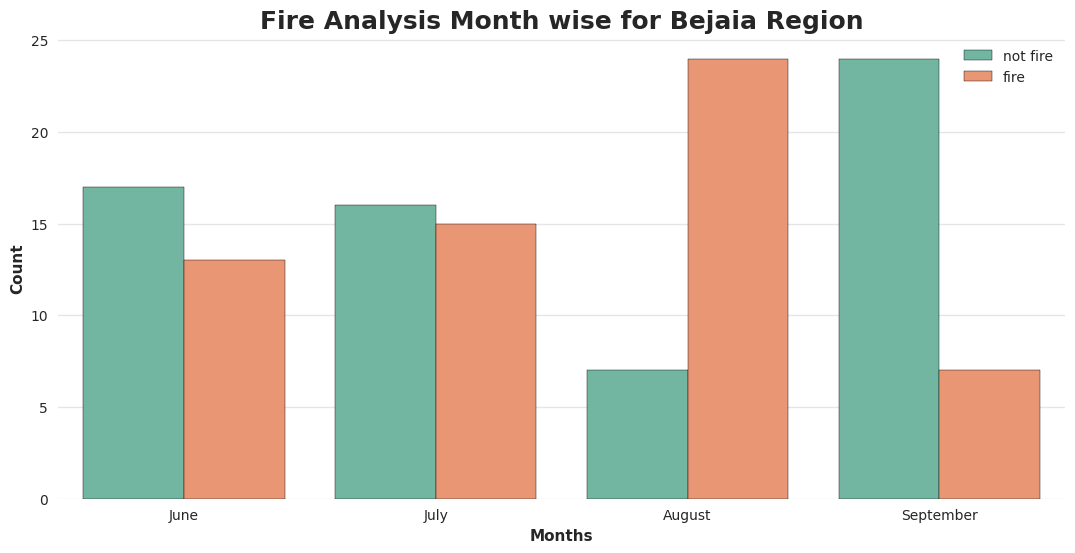

In [ ]:
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Fire',data= data,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise for Bejaia Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

In [ ]:
#Droping Year features
data = data.drop(['day','month','year'], axis=1)

In [ ]:
# Encoding Not fire as 0 and Fire as 1
data['Fire']= np.where(data['Fire']== 'not fire',0,1)

In [ ]:
# Check counts
data.Fire.value_counts()

0    64
1    59
Name: Fire, dtype: int64

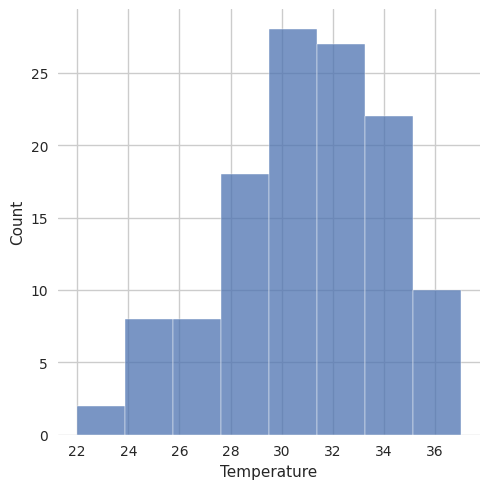

In [ ]:
#Data Visualization.
sns.displot(data["Temperature"])

<ipython-input-187-fdca4043952a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


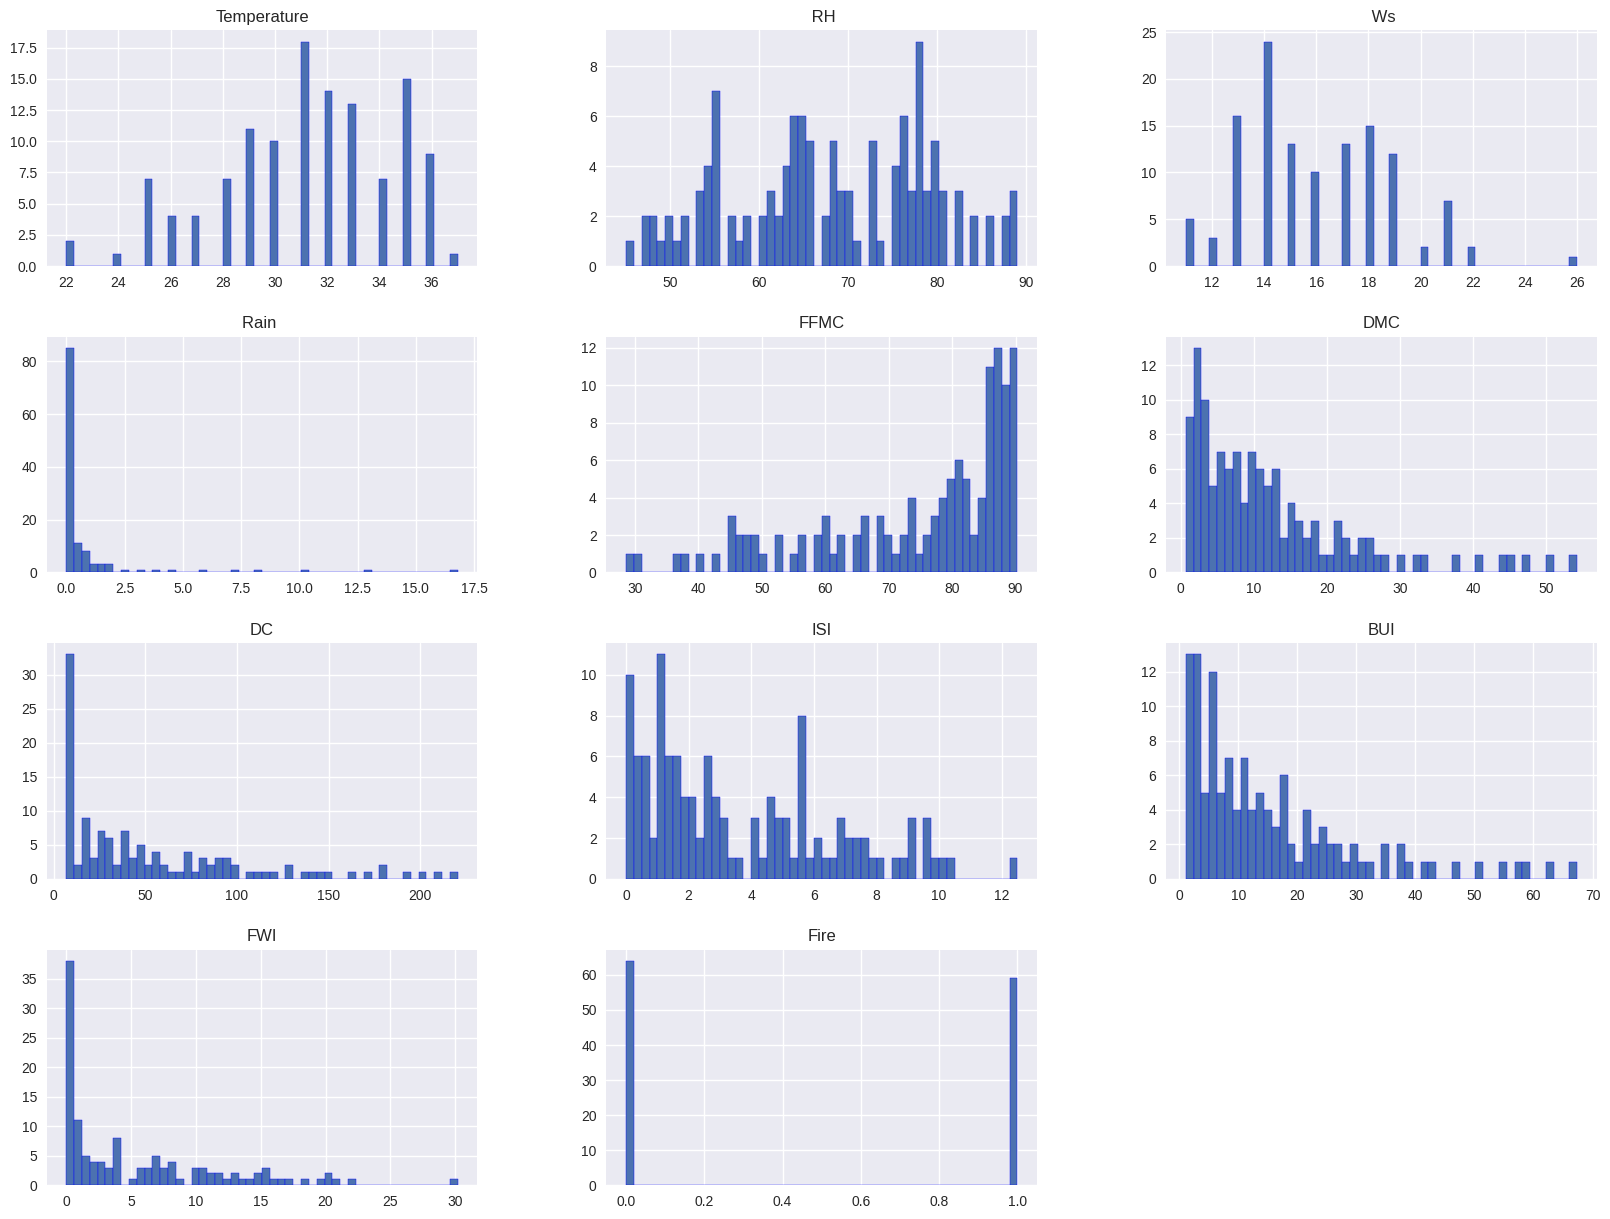

In [ ]:
# PLot density plot for all features
plt.style.use('seaborn')
data.hist(bins=50, figsize=(20,15), ec = 'b')
plt.show()

In [ ]:
# Percentage for PieChart
percentage_of_fire = data.Fire.value_counts(normalize=True)*100
percentage_of_fire

0    52.03252
1    47.96748
Name: Fire, dtype: float64

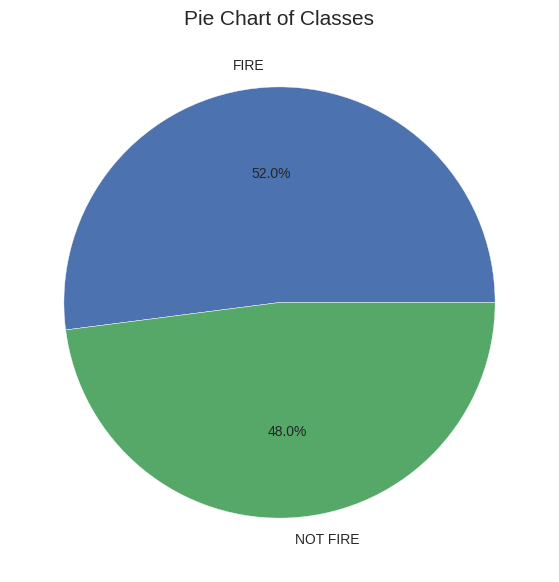

In [ ]:
#plotting PieChart
classeslabels = ["FIRE", "NOT FIRE"]
plt.figure(figsize =(12, 7))
plt.pie(percentage_of_fire,labels = classeslabels,autopct='%1.1f%%')
plt.title ("Pie Chart of Classes", fontsize = 15)
plt.show()

In [ ]:
data.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Fire
Temperature,1.000000,-0.662304,-0.213870,-0.483551,0.755531,0.545953,0.536988,0.668274,0.546400,0.611037,0.503476
RH,-0.662304,1.000000,0.239327,0.329705,-0.655308,-0.351493,-0.318697,-0.589723,-0.342591,-0.479377,-0.381711
Ws,-0.213870,0.239327,1.000000,0.347213,-0.196778,0.044465,0.103766,-0.032445,0.067033,0.034432,-0.115191
Rain,-0.483551,0.329705,0.347213,1.000000,-0.568553,-0.266135,-0.284357,-0.366554,-0.272694,-0.293592,-0.334874
FFMC,0.755531,-0.655308,-0.196778,-0.568553,1.000000,0.611734,0.578577,0.791948,0.603810,0.676940,0.744810
DMC,0.545953,-0.351493,0.044465,-0.266135,0.611734,1.000000,0.962436,0.752097,0.995579,0.902384,0.619722
DC,0.536988,-0.318697,0.103766,-0.284357,0.578577,0.962436,1.000000,0.719708,0.982665,0.870717,0.591296
ISI,0.668274,-0.589723,-0.032445,-0.366554,0.791948,0.752097,0.719708,1.000000,0.748701,0.944212,0.833194
BUI,0.546400,-0.342591,0.067033,-0.272694,0.603810,0.995579,0.982665,0.748701,1.000000,0.901043,0.615301
FWI,0.611037,-0.479377,0.034432,-0.293592,0.676940,0.902384,0.870717,0.944212,0.901043,1.000000,0.761356


<Axes: >

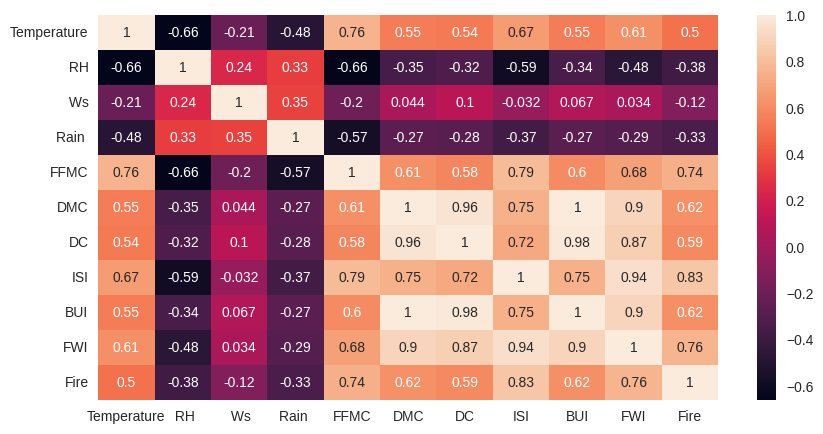

In [ ]:
#specify size of heatmap
fig, ax = plt.subplots(figsize=(10, 5))

#create heatmap
sns.heatmap(data.corr(),annot=True)

In [ ]:
X = data.drop('FWI',axis=1)
y= data['FWI']

In [ ]:
from sklearn.model_selection import train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape, X_test.shape

((92, 10), (31, 10))

In [ ]:
def scaler_standard(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled

In [ ]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


lreg = LinearRegression()
lreg.fit(X_train_scaled, y_train)
lreg_pred = lreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, lreg_pred)
r2 = r2_score(y_test, lreg_pred)

print("Linear Regression")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))



Linear Regression
R2 Score value: 0.9903
MAE value: 0.4790
